# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

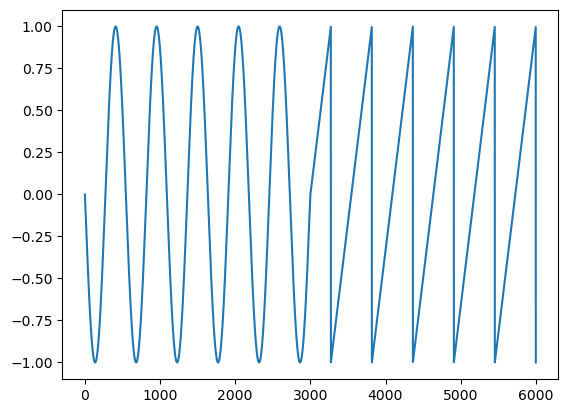

In [3]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [4]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


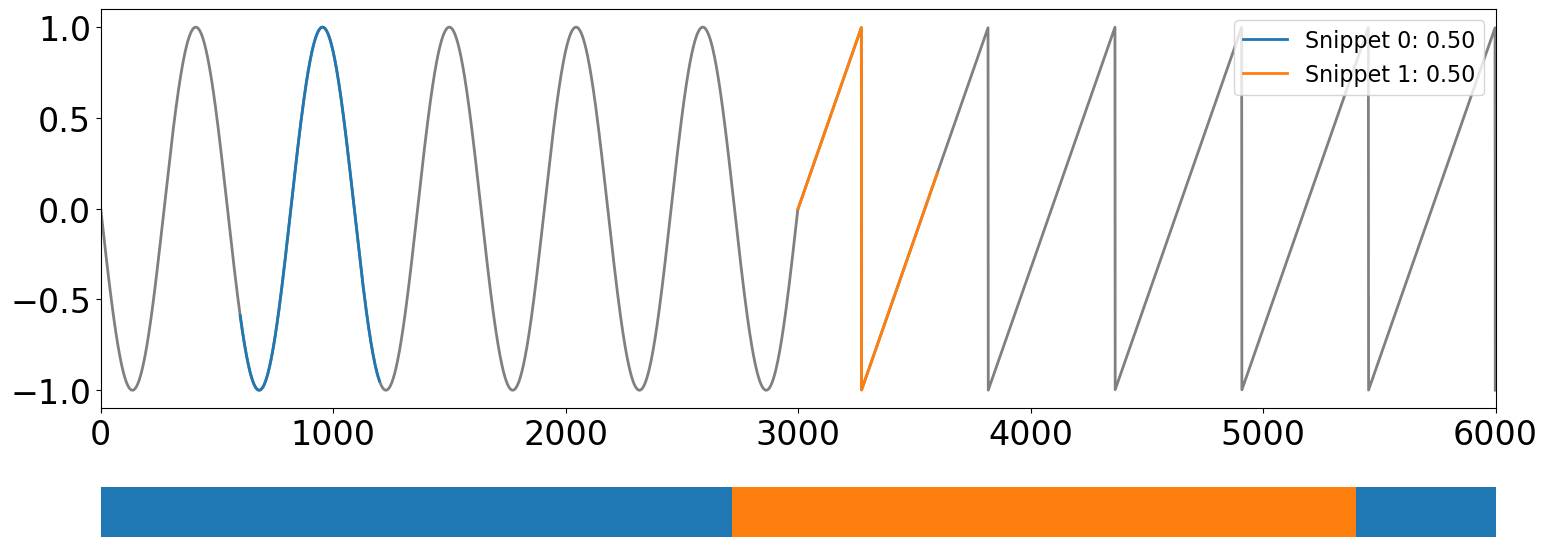

<Axes: >

In [5]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [7]:
# INSERT YOUR CODE
import pandas as pd

pamap = np.loadtxt('./datasets/PAMAP/PAMAP.txt')

timestamp = pamap[0]
gyroscope_data = pamap[11]
activity_ids = pamap[1]

gyroscope_data = gyroscope_data[np.where((timestamp >= 1790)
                                       & (timestamp <= 1930))]

snp = snippets(gyroscope_data, 600, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

600


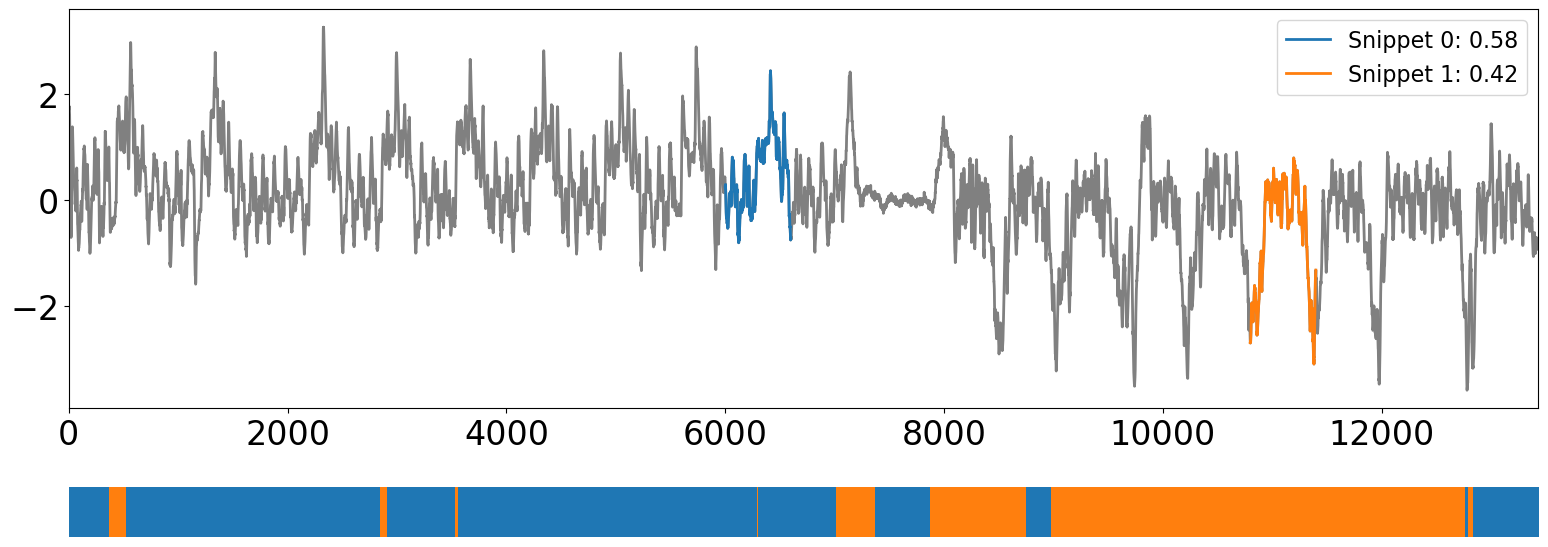

<Axes: >

In [9]:
# INSERT YOUR CODE
plot_snippets(gyroscope_data, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [11]:
# INSERT YOUR CODE
from sklearn.metrics import accuracy_score

filteredactivityIDdata  = activity_ids[np.where((timestamp >= 1790)
                                       & (timestamp <= 1930))]
filteredactivityIDdata  -= filteredactivityIDdata.min()

snpfilteredactivityIDdata = np.zeros(len(filteredactivityIDdata))
for value, start, end in snp[-1]:
    snpfilteredactivityIDdata[start:end] = value
accuracy = accuracy_score(filteredactivityIDdata, snpfilteredactivityIDdata)
accuracy

0.8635145197319434

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Результаты показывают, что алгоритм способен автоматически выделять повторяющиеся и характерные движения. Cниппеты позволяют кластеризовывать временные ряды.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [12]:
# INSERT YOUR CODE
pamap = np.loadtxt('./datasets/PAMAP/PAMAP.txt')
timestamp = pamap[0]
gyro_x = pamap[10] 
gyro_y = pamap[11]  
gyro_z = pamap[12]  
activity_id = pamap[1]

In [13]:
start_time = 1790
end_time = 1930

In [14]:
filteredx = gyro_x[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredy = gyro_y[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredz = gyro_z[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredactivityIDdata = activity_id[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredactivityIDdata -= filteredactivityIDdata.min()

In [15]:
snp_x = snippets(filteredx, 600, 2, percentage=0.5)
snp_y = snippets(filteredy, 600, 2, percentage=0.5)
snp_z = snippets(filteredz, 600, 2, percentage=0.5)

600


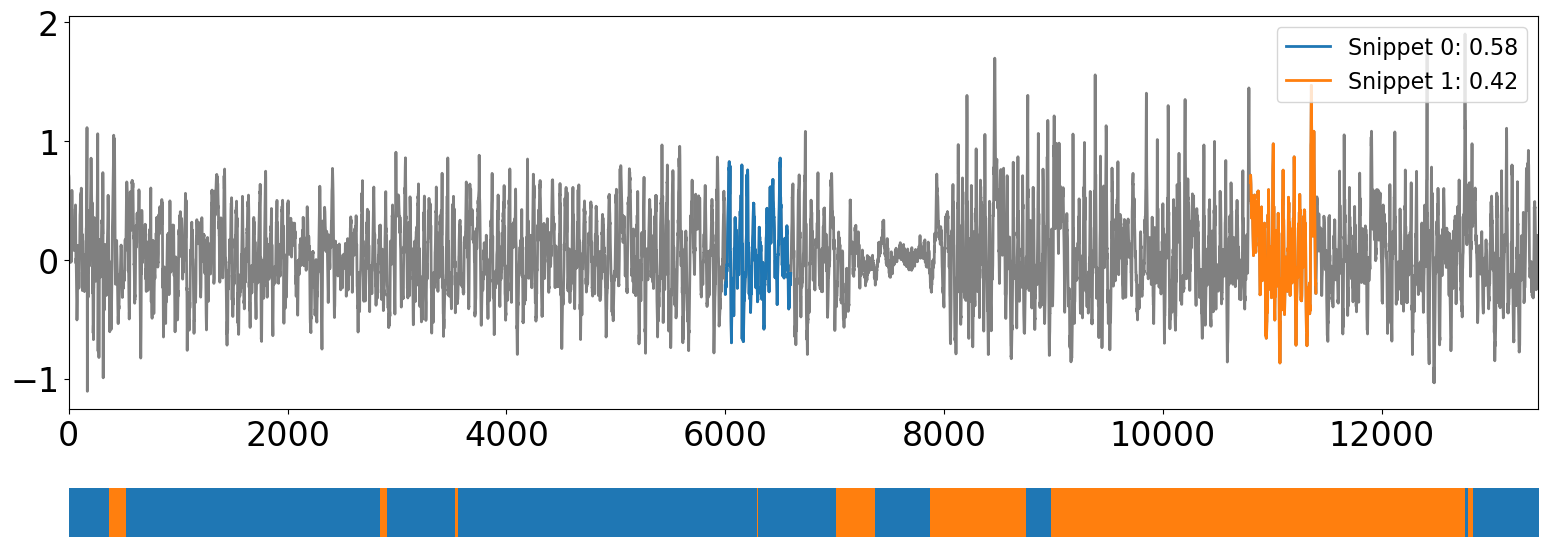

<Axes: >

In [16]:
plot_snippets(filteredx, snp)

600


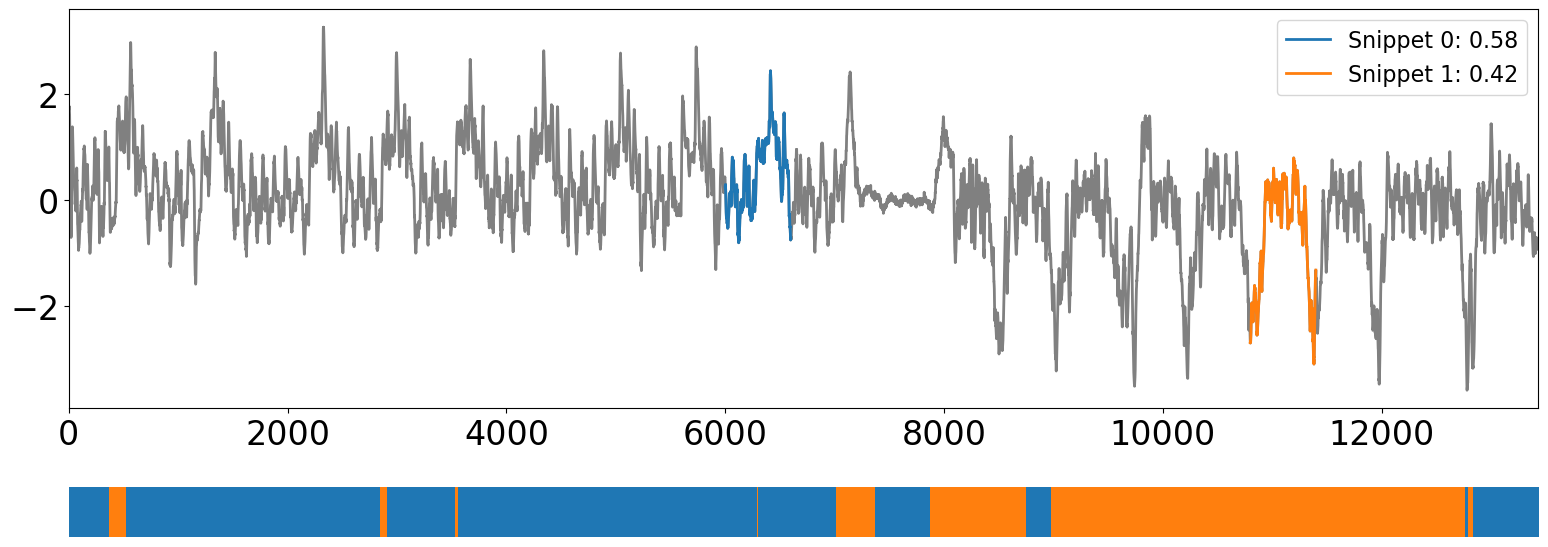

<Axes: >

In [17]:
plot_snippets(filteredy, snp)

600


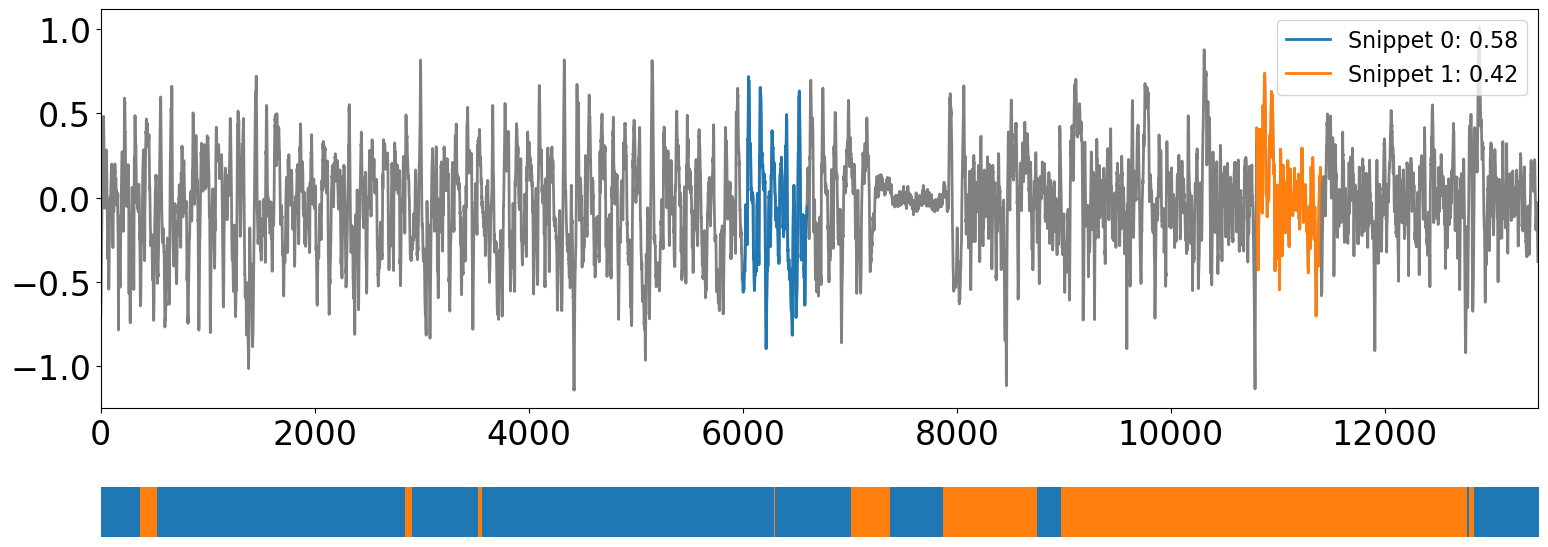

<Axes: >

In [18]:
plot_snippets(filteredz, snp)

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [19]:
# INSERT YOUR CODE
snp_activity_ids_x = np.zeros(len(filteredx))
snp_activity_ids_y = np.zeros(len(filteredy))
snp_activity_ids_z = np.zeros(len(filteredz))

for value, start, end in snp_x[-1]:
    snp_activity_ids_x[start:end] = value
for value, start, end in snp_y[-1]:
    snp_activity_ids_y[start:end] = value
for value, start, end in snp_z[-1]:
    snp_activity_ids_z[start:end] = value

In [20]:
final_activity_ids = []
for i in range(len(filteredx)):
    votes = [snp_activity_ids_x[i], snp_activity_ids_y[i], snp_activity_ids_z[i]]
    final_activity_ids.append(np.bincount(votes).argmax()) 

final_activity_ids = np.array(final_activity_ids)

accuracy = accuracy_score(filteredactivityIDdata, final_activity_ids)
accuracy

0.8891288160833953

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

точность возрасла почти, что говорит о более точных прогнозах при использовании комбинированных данных с разных осей гироскоп

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [11]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [12]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?